In [61]:
# Fristly, import packages.
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
%config InlineBackend.figure_format = 'retina'

In [2]:
#Read bicycle sharing data
bikedata = pd.read_csv(r'DATA_Cleaned.csv')
bikedata.head(5)

START_TIME  START_LAT             END_TIME     END_LNG  \
0  2021-07-18 23:37:10  22.722193  2021-07-19 00:30:48  114.293735   
1  2021-07-18 23:37:11  22.630734  2021-07-18 23:45:18  114.051401   
2  2021-07-18 23:37:11  22.630641  2021-07-18 23:45:18  114.051307   
3  2021-07-18 23:37:11  22.587205  2021-07-18 23:48:36  113.873857   
4  2021-07-18 23:37:11  22.583960  2021-07-18 23:52:19  113.956495   

    START_LNG    END_LAT                       start_point  \
0  114.287819  22.716855      POINT (114.287819 22.722193)   
1  114.055318  22.635949  POINT (114.05531813 22.63073398)   
2  114.055225  22.635856  POINT (114.05522493 22.63064078)   
3  113.861478  22.580957    POINT (113.8614776 22.5872051)   
4  113.954422  22.580334       POINT (113.954422 22.58396)   

                              end_point   distance_m  duration_min  speed_m_s  
0          POINT (114.293735 22.716855)   847.831888     53.633333   0.263465  
1      POINT (114.05140056 22.63594924)   704.076357      8.116667   1.445742  
2      POINT (114.05130736 22.63585604)   704.076507      8.116667   1.445742  
3  POINT (113.8738566035 22.5809568497)  1448.874169     11.416667   2.115145  
4          POINT (113.956495 22.580334)   454.616893     15.133333   0.500679

In [5]:
#Read the polygon of the study area
shenzhen_admin = gpd.read_file(r'440300.geojson')
#delete the data outside of the study area
bikedata = tbd.clean_outofshape(bikedata, shenzhen_admin, col=['START_LNG', 'START_LAT'], accuracy=500)

In [6]:
print(len(bikedata))

9462675


In [9]:
# 删除不需要的列
bikedata = bikedata.drop(columns=['start_point', 'end_point', 'distance_m', 'duration_min', 'speed_m_s'])

# 重命名列以符合新要求
bikedata = bikedata.rename(columns={
    'START_TIME': 'stime',
    'START_LNG': 'slon',
    'START_LAT': 'slat',
    'END_TIME': 'etime',
    'END_LNG': 'elon',
    'END_LAT': 'elat'
})

# 重新排列列顺序
move_data = bikedata[['stime', 'slon', 'slat', 'etime', 'elon', 'elat']]

# 确认结果
print(move_data.head())


                 stime        slon       slat                etime  \
0  2021-07-18 23:37:10  114.287819  22.722193  2021-07-19 00:30:48   
1  2021-07-18 23:37:11  114.055318  22.630734  2021-07-18 23:45:18   
2  2021-07-18 23:37:11  114.055225  22.630641  2021-07-18 23:45:18   
3  2021-07-18 23:37:11  113.861478  22.587205  2021-07-18 23:48:36   
4  2021-07-18 23:37:11  113.954422  22.583960  2021-07-18 23:52:19   

         elon       elat  
0  114.293735  22.716855  
1  114.051401  22.635949  
2  114.051307  22.635856  
3  113.873857  22.580957  
4  113.956495  22.580334  


In [16]:
#obtain gridding params
bounds = (113.73, 22.38, 114.64, 22.87)
params = tbd.area_to_params(bounds,accuracy = 500)
#aggregate the travel informations
od_gdf = tbd.odagg_grid(move_data, params, col=['slon', 'slat', 'elon', 'elat'])
od_gdf

e:\Python\Lib\site-packages\transbigdata\odprocess.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oddata['SLONCOL'], oddata['SLATCOL'] = GPS_to_grid(
e:\Python\Lib\site-packages\transbigdata\odprocess.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oddata['ELONCOL'], oddata['ELATCOL'] = GPS_to_grid(
e:\Python\Lib\site-packages\transbigdata\odprocess.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

SLONCOL  SLATCOL  ELONCOL  ELATCOL  count      SHBLON     SHBLAT  \
327176      164       29      165       21      1  114.528927  22.510402   
327175      164       28      164       21      1  114.528927  22.505905   
327174      164       22      164       21      1  114.528927  22.478925   
327173      163       47      163       48      1  114.524055  22.591340   
18            7       75       13       66      1  113.764101  22.717245   
...         ...      ...      ...      ...    ...         ...        ...   
199913       61       62       60       61   4925  114.027162  22.658790   
182659       55       47       53       47   5763  113.997933  22.591340   
215610       65       39       65       39   6417  114.046648  22.555368   
186328       57       34       58       34   6616  114.007676  22.532885   
188492       58       34       57       34   7205  114.012547  22.532885   

            EHBLON     EHBLAT  \
327176  114.533798  22.474429   
327175  114.528927  22.474429   
327174  114.528927  22.474429   
327173  114.524055  22.595837   
18      113.793330  22.676776   
...            ...        ...   
199913  114.022290  22.654293   
182659  113.988190  22.591340   
215610  114.046648  22.555368   
186328  114.012547  22.532885   
188492  114.007676  22.532885   

                                                 geometry  
327176  LINESTRING (114.52893 22.5104, 114.5338 22.47443)  
327175  LINESTRING (114.52893 22.5059, 114.52893 22.47...  
327174  LINESTRING (114.52893 22.47893, 114.52893 22.4...  
327173  LINESTRING (114.52406 22.59134, 114.52406 22.5...  
18      LINESTRING (113.7641 22.71725, 113.79333 22.67...  
...                                                   ...  
199913  LINESTRING (114.02716 22.65879, 114.02229 22.6...  
182659  LINESTRING (113.99793 22.59134, 113.98819 22.5...  
215610  LINESTRING (114.04665 22.55537, 114.04665 22.5...  
186328  LINESTRING (114.00768 22.53288, 114.01255 22.5...  
188492  LINESTRING (114.01255 22.53288, 114.00768 22.5...  

[327191 rows x 10 columns]

e:\Python\Lib\site-packages\transbigdata\plotmap.py:67: UserWarning: Mapboxtoken not found, The basemap is set as OpenStreetMapplease use tbd.set_mapboxtoken() to set the access token, see: https://transbigdata.readthedocs.io/en/latest/plot_map.html
  warnings.warn("Mapboxtoken not found, "   # pragma: no cover
e:\Python\Lib\site-packages\transbigdata\plotmap.py:111: UserWarning: Map base map storage path not found,         please use tbd.set_imgsavepath() to set it first,         see: https://transbigdata.readthedocs.io/en/latest/plot_map.html
  warnings.warn('Map base map storage path not found, \
e:\Python\Lib\site-packages\transbigdata\plotmap.py:365: UserWarning: imgsavepath do not exist, your tile map will not save
  warnings.warn(


[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''


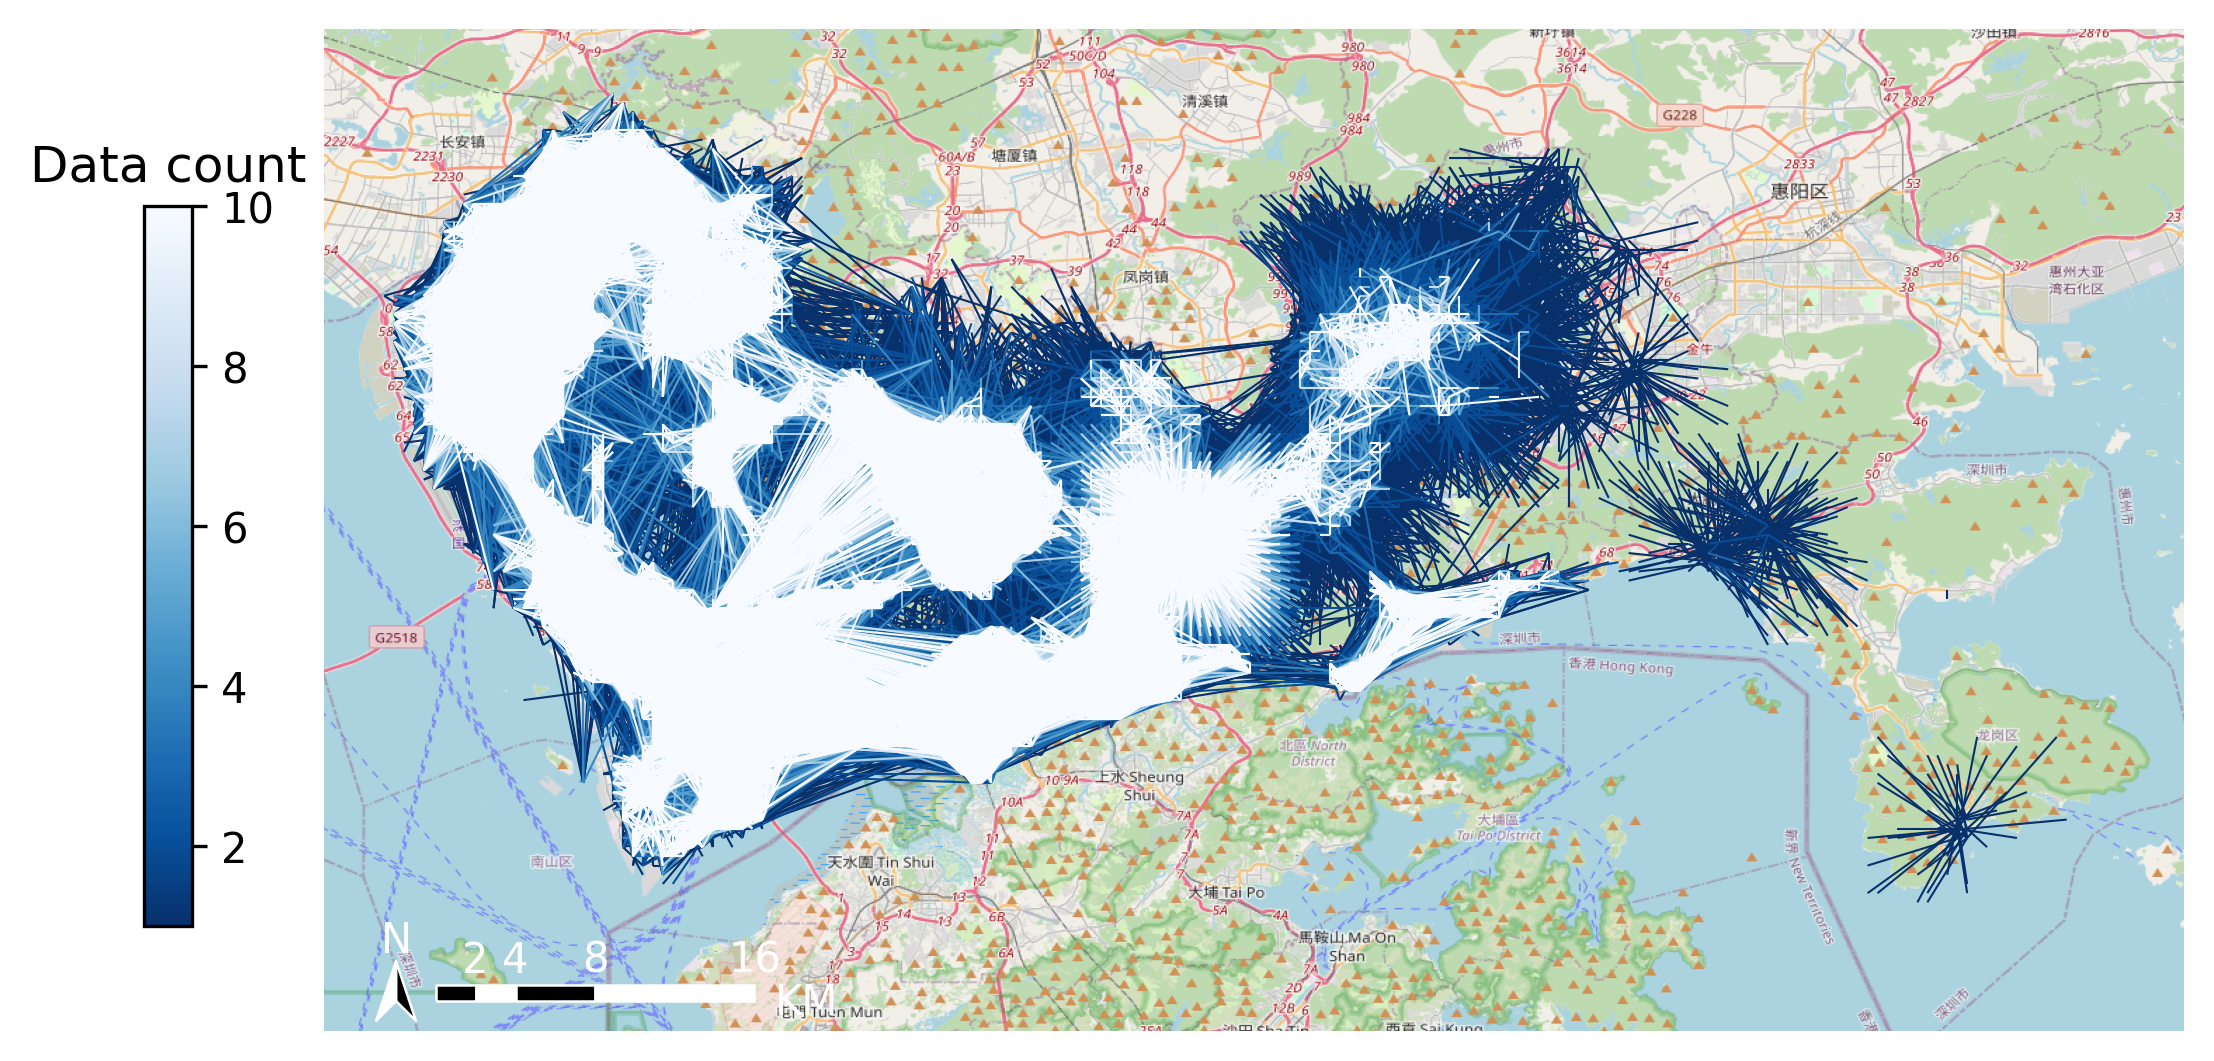

In [17]:
#Create figure
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)

#Load basemap
tbd.plot_map(plt,bounds,zoom = 11,style = 8)

#Create colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('Data count')
plt.sca(ax)

#Plot OD
od_gdf.plot(ax = ax,column = 'count',cmap = 'Blues_r',linewidth = 0.5,vmax = 10,cax = cax,legend = True)

#Plot compass and scale
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,textcolor = 'white',accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

In [18]:
#Combine the ``LONCOL`` and ``LATCOL`` columns into one field
od_gdf['S'] = od_gdf['SLONCOL'].astype(str) + ',' + od_gdf['SLATCOL'].astype(str)
od_gdf['E'] = od_gdf['ELONCOL'].astype(str) + ',' + od_gdf['ELATCOL'].astype(str)
#extract node set
node = set(od_gdf['S'])|set(od_gdf['E'])
node = pd.DataFrame(node)
#reindex the node
node['id'] = range(len(node))
node

0    id
0     115,63     0
1     124,84     1
2      30,76     2
3      58,33     3
4     148,48     4
...      ...   ...
5844  108,73  5844
5845   33,38  5845
5846   44,86  5846
5847   88,55  5847
5848   34,95  5848

[5849 rows x 2 columns]

In [19]:
#Merge the node information to the OD data to extract edge data.
node.columns = ['S','S_id']
od_gdf = pd.merge(od_gdf,node,on = ['S'])
node.columns = ['E','E_id']
od_gdf = pd.merge(od_gdf,node,on = ['E'])
#Extract edge data
edge = od_gdf[['S_id','E_id','count']]
edge

S_id  E_id  count
0       4291  4544      1
1       1661  4056      1
2       5374  4056      1
3        335   255      1
4       2500  5219      1
...      ...   ...    ...
327186  4293  1023   4925
327187  3920  1497   5763
327188   793   793   6417
327189  1119  4791   6616
327190  4791  1119   7205

[327191 rows x 3 columns]

In [20]:
import igraph
#Create Network
g = igraph.Graph()
#Add node
g.add_vertices(len(node))
#Add edge
g.add_edges(edge[['S_id','E_id']].values)
#Add weight
edge_weights = edge[['count']].values
for i in range(len(edge_weights)):
    g.es[i]['weight'] = edge_weights[i]

In [21]:
#Community detection
g_clustered = g.community_multilevel(weights = edge_weights, return_levels=False)

In [22]:
#Modularity
g_clustered.modularity

0.8556847259518192

In [23]:
#Assign the group result to the node
node['group'] = g_clustered.membership
#rename the columns
node.columns = ['grid','node_id','group']
node

grid  node_id  group
0     115,63        0      0
1     124,84        1      0
2      30,76        2      1
3      58,33        3      2
4     148,48        4      3
...      ...      ...    ...
5844  108,73     5844      0
5845   33,38     5845     13
5846   44,86     5846      4
5847   88,55     5847     12
5848   34,95     5848      4

[5849 rows x 3 columns]

In [54]:
# Count the number of grids per community
group = node['group'].value_counts()
# Extract communities with more than 10 grids
group = group[group > 10]
# Retain only these community grids
node = node[node['group'].apply(lambda r: r in group.index)]

# Get the grid number
node['LONCOL'] = node['grid'].apply(lambda r: r.split(',')[0]).astype(int)
node['LATCOL'] = node['grid'].apply(lambda r: r.split(',')[1]).astype(int)

node['gridid'] = list(zip(node['LONCOL'], node['LATCOL']))

# Generate the geometry for each gridid
node['geometry'] = node['gridid'].apply(lambda gridid: tbd.grid_to_polygon(gridid, params))

# Change it into GeoDataFrame
import geopandas as gpd
node = gpd.GeoDataFrame(node)

node

C:\Users\MOMO\AppData\Local\Temp\ipykernel_8580\2259980768.py:15: UserWarning: Geometry column does not contain geometry.
  node['geometry'] = node['gridid'].apply(lambda gridid: tbd.grid_to_polygon(gridid, params))


grid  node_id  group  LONCOL  LATCOL     gridid  \
0     115,63        0      0     115      63  (115, 63)   
1     124,84        1      0     124      84  (124, 84)   
2      30,76        2      1      30      76   (30, 76)   
3      58,33        3      2      58      33   (58, 33)   
4     148,48        4      3     148      48  (148, 48)   
...      ...      ...    ...     ...     ...        ...   
5844  108,73     5844      0     108      73  (108, 73)   
5845   33,38     5845     13      33      38   (33, 38)   
5846   44,86     5846      4      44      86   (44, 86)   
5847   88,55     5847     12      88      55   (88, 55)   
5848   34,95     5848      4      34      95   (34, 95)   

                                               geometry  
0     [POLYGON ((114.2877872359202 22.66103782540143...  
1     [POLYGON ((114.3316307741148 22.75546653473631...  
2     [POLYGON ((113.87370937519341 22.7194936930849...  
3     [POLYGON ((114.01011149402106 22.5261396692087...  
4     [POLYGON ((114.44854687596707 22.5935887473050...  
...                                                 ...  
5844  [POLYGON ((114.25368670621329 22.7060038774656...  
5845  [POLYGON ((113.88832388792495 22.5486226952408...  
5846  [POLYGON ((113.94191043460724 22.7644597451491...  
5847  [POLYGON ((114.1562566213364 22.62506498375004...  
5848  [POLYGON ((113.89319539216879 22.8049291920069...  

[5823 rows x 7 columns]

In [55]:
print(node['geometry'].head())
print(type(node['geometry'].iloc[0]))


0    [POLYGON ((114.2877872359202 22.66103782540143...
1    [POLYGON ((114.3316307741148 22.75546653473631...
2    [POLYGON ((113.87370937519341 22.7194936930849...
3    [POLYGON ((114.01011149402106 22.5261396692087...
4    [POLYGON ((114.44854687596707 22.5935887473050...
Name: geometry, dtype: object
<class 'list'>


In [56]:
from shapely.geometry import Polygon

# Convert the geometry column from list to Polygon
node['geometry'] = node['geometry'].apply(lambda coords: Polygon(coords[0]) if isinstance(coords, list) else None)

# Check if the conversion was successful
print(node['geometry'].head())


0    POLYGON ((114.28779 22.66104, 114.29266 22.661...
1    POLYGON ((114.33163 22.75547, 114.3365 22.7554...
2    POLYGON ((113.87371 22.71949, 113.87858 22.719...
3    POLYGON ((114.01011 22.52614, 114.01498 22.526...
4    POLYGON ((114.44855 22.59359, 114.45342 22.593...
Name: geometry, dtype: geometry


In [62]:
import geopandas as gpd

# Convert to GeoDataFrame
node = gpd.GeoDataFrame(node)

# Set geometry column as active
node = node.set_geometry('geometry')

# Plot the data
node.plot('group')


<Axes: >

In [58]:
#Use the group column to merge polygon
node_community = tbd.merge_polygon(node,'group')
#Input polygon GeoDataFrame data, take the exterior boundary of the polygon to form a new polygon
node_community = tbd.polyon_exterior(node_community,minarea = 0.000100)

e:\Python\Lib\site-packages\transbigdata\gisprocess.py:234: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  data1['geometry'] = geometries


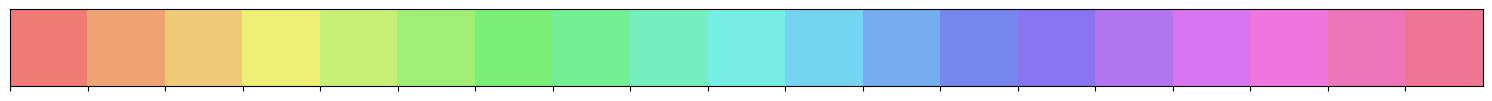

In [59]:
#Generate palette
import seaborn as sns
## l: Luminance
## s: Saturation
cmap = sns.hls_palette(n_colors=len(node_community), l=.7, s=0.8)
sns.palplot(cmap)

e:\Python\Lib\site-packages\transbigdata\plotmap.py:67: UserWarning: Mapboxtoken not found, The basemap is set as OpenStreetMapplease use tbd.set_mapboxtoken() to set the access token, see: https://transbigdata.readthedocs.io/en/latest/plot_map.html
  warnings.warn("Mapboxtoken not found, "   # pragma: no cover
e:\Python\Lib\site-packages\transbigdata\plotmap.py:111: UserWarning: Map base map storage path not found,         please use tbd.set_imgsavepath() to set it first,         see: https://transbigdata.readthedocs.io/en/latest/plot_map.html
  warnings.warn('Map base map storage path not found, \
e:\Python\Lib\site-packages\transbigdata\plotmap.py:365: UserWarning: imgsavepath do not exist, your tile map will not save
  warnings.warn(


[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''
[WinError 3] 系统找不到指定的路径。: ''


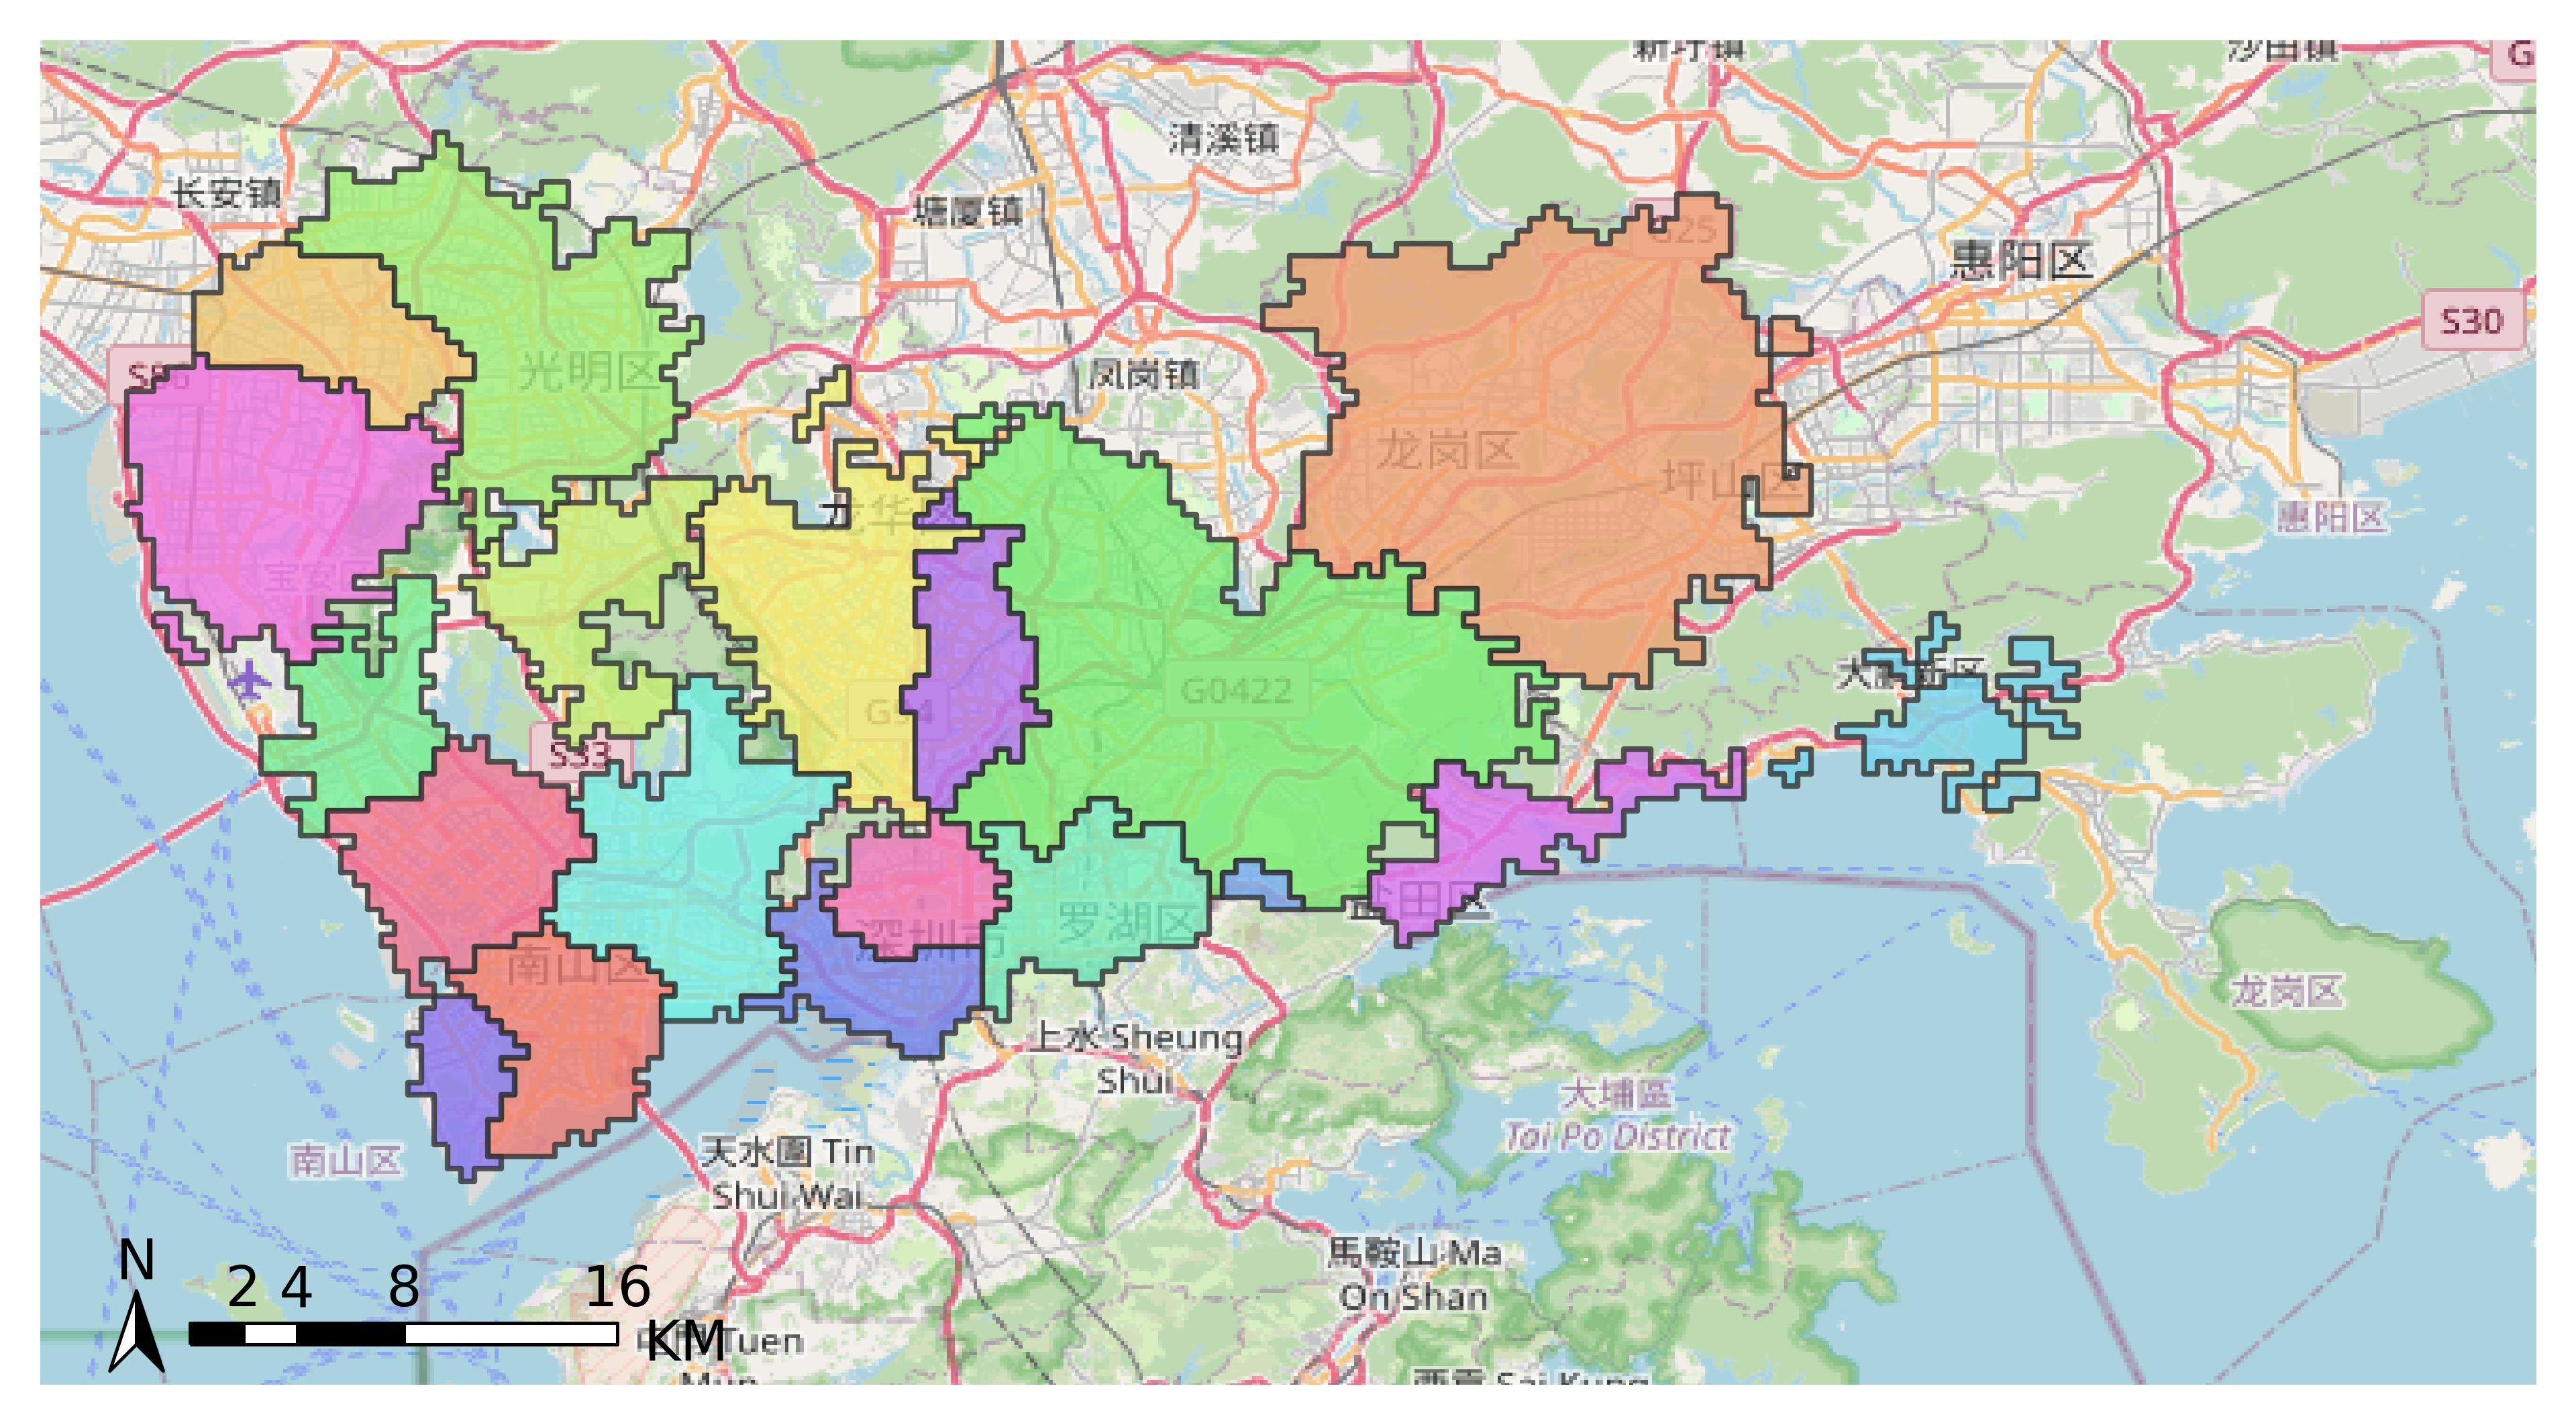

In [68]:
#Create figure
import matplotlib.pyplot as plt
fig =plt.figure(1,(8,8),dpi=300)
ax =plt.subplot(111)
plt.sca(ax)
#Load basemap
tbd.plot_map(plt,bounds,zoom = 10,style = 6)
#Set colormap
from matplotlib.colors import ListedColormap
#Disrupting the order of the community
node_community = node_community.sample(frac=1)
#Plot community
node_community.plot(cmap = ListedColormap(cmap),ax = ax,edgecolor = '#333',alpha = 0.8)
#Add scale
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,textcolor = 'k'
              ,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

In [72]:
from shapely.geometry import MultiPolygon, Polygon

# 遍历每个社区的几何
for idx, community in node_community.iterrows():
    geometry = community['geometry']
    
    if isinstance(geometry, MultiPolygon):
        # 如果是 MultiPolygon，遍历每个子多边形
        for poly in geometry.geoms:
            boundary = poly.boundary
            print(f"Community {idx} boundary coordinates: {boundary.coords[:]}")

    elif isinstance(geometry, Polygon):
        # 如果是 Polygon，直接获取边界
        boundary = geometry.boundary
        print(f"Community {idx} boundary coordinates: {boundary.coords[:]}")

    # 可选：将每个多边形的边界添加到地图上
    ax.plot(*boundary.xy, color='red', linewidth=2)

plt.show()


Community 17 boundary coordinates: [(113.89806689641264, 22.47667701193809), (113.89806689641264, 22.481173617144513), (113.89806689641264, 22.485670222350937), (113.90293840065648, 22.485670222350937), (113.90293840065648, 22.49016682755736), (113.90293840065648, 22.494663432763783), (113.89806689641264, 22.494663432763783), (113.89806689641264, 22.499160037970206), (113.90293840065648, 22.499160037970206), (113.90780990490033, 22.499160037970206), (113.90780990490033, 22.50365664317663), (113.90293840065648, 22.50365664317663), (113.90293840065648, 22.508153248383053), (113.89806689641264, 22.508153248383053), (113.89806689641264, 22.512649853589476), (113.89319539216879, 22.512649853589476), (113.89319539216879, 22.5171464587959), (113.88832388792495, 22.5171464587959), (113.88832388792495, 22.52164306400232), (113.8834523836811, 22.52164306400232), (113.8834523836811, 22.526139669208742), (113.87858087943727, 22.526139669208742), (113.87858087943727, 22.530636274415166), (113.88345

In [73]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

In [76]:
# 假设 bike 是一个 Pandas DataFrame
bike = pd.read_csv('DATA_Cleaned.csv')

# 创建出发点的几何对象（Point）
bike['geometry'] = [Point(lon, lat) for lon, lat in zip(bike['START_LNG'], bike['START_LAT'])]

# 将 bike 转换为 GeoDataFrame
gdf_bike = gpd.GeoDataFrame(bike, geometry='geometry', crs="EPSG:4326")  # 假设数据是 WGS84 坐标系


In [78]:
import geopandas as gpd

# 假设 node_community 是一个 GeoDataFrame
# 如果没有 CRS 信息，设置为 EPSG:4326
node_community.set_crs("EPSG:4326", allow_override=True, inplace=True)

# 现在可以安全地转换 CRS
node_community = node_community.to_crs("EPSG:4326")

In [79]:
# 创建一个空字典来保存按社区分类的数据
community_groups = {}

# 遍历每个社区
for community_idx, community in node_community.iterrows():
    # 获取社区的多边形几何
    community_geom = community['geometry']
    
    # 筛选出在该社区内的出发点
    points_within_community = gdf_bike[gdf_bike['geometry'].within(community_geom)]
    
    # 将符合条件的记录添加到社区字典中
    community_groups[community_idx] = points_within_community

In [80]:
# 打印每个社区内的骑行数据
for community_idx, group in community_groups.items():
    print(f"Community {community_idx}:")
    print(group[['START_TIME', 'START_LAT', 'START_LNG', 'END_TIME', 'END_LAT', 'END_LNG', 'start_point', 'end_point', 'distance_m', 'duration_min', 'speed_m_s']])
    print("\n")

Community 17:
                  START_TIME  START_LAT   START_LNG             END_TIME  \
12       2021-07-18 23:37:12  22.524995  113.936336  2021-07-18 23:40:57   
51       2021-07-18 23:37:16  22.482324  113.914641  2021-07-18 23:54:01   
82       2021-07-18 23:37:20  22.531109  113.920797  2021-07-18 23:50:47   
83       2021-07-18 23:37:20  22.529040  113.924406  2021-07-18 23:49:19   
91       2021-07-18 23:37:21  22.490033  113.917591  2021-07-19 00:21:15   
...                      ...        ...         ...                  ...   
9462663  2021-07-11 22:48:28  22.488123  113.927993  2021-07-12 00:00:13   
9462664  2021-07-11 22:48:28  22.488207  113.928077  2021-07-12 00:00:13   
9462665  2021-07-11 22:49:01  22.487993  113.928016  2021-07-12 00:00:30   
9462666  2021-07-11 22:49:20  22.505058  113.928268  2021-07-12 00:11:35   
9462671  2021-07-11 22:51:00  22.517778  113.923152  2021-07-12 00:00:18   

           END_LAT     END_LNG                       start_point  \
12   

In [86]:
# 保存每个社区内的骑行数据到独立的CSV文件中
for community_idx, group in community_groups.items():
    filename = f"community_{community_idx}.csv"
    group.to_csv(filename, columns=['START_TIME', 'START_LAT', 'START_LNG', 'END_TIME', 'END_LAT', 'END_LNG', 'start_point', 'end_point', 'distance_m', 'duration_min', 'speed_m_s'], index=False)

In [81]:
# 统计社区的数量
num_communities = len(node_community)
# 或者使用 shape 属性
num_communities = node_community.shape[0]

print(f"Total number of communities: {num_communities}")

Total number of communities: 19


In [85]:
import pandas as pd

# 创建一个空字典来存储每个社区的统计信息
community_stats = {}

# 假设 node_community 是社区的边界数据，gdf_bikedata 是骑行数据
# 遍历每个社区
for community_idx, community in node_community.iterrows():
    community_geom = community['geometry']
    
    # 筛选出在该社区内的骑行数据
    points_within_community = gdf_bike[gdf_bike['geometry'].within(community_geom)]
    
    # 提取需要的列
    community_data = points_within_community[['distance_m', 'duration_min', 'speed_m_s']]
    
    # 计算平均值和标准差
    avg_stats = community_data.mean()
    std_stats = community_data.std()
    
    # 将统计信息存储在字典中
    community_stats[community_idx] = {
        'avg_distance_m': avg_stats['distance_m'],
        'avg_duration_min': avg_stats['duration_min'],
        'avg_speed_m_s': avg_stats['speed_m_s'],
        'std_distance_m': std_stats['distance_m'],
        'std_duration_min': std_stats['duration_min'],
        'std_speed_m_s': std_stats['speed_m_s']
    }

# 将结果转换为 DataFrame 方便查看
community_stats_df = pd.DataFrame.from_dict(community_stats, orient='index')

# 打印每个社区的统计信息
print(community_stats_df)


    avg_distance_m  avg_duration_min  avg_speed_m_s  std_distance_m  \
17     1078.780924         12.236214       1.712214      870.107773   
0      1990.439615         19.697514       2.361243     1720.963553   
5      1311.373623         13.609814       1.971063     1102.531293   
6      1098.264696         11.187149       1.819677      988.597245   
10     1176.900708         13.010572       1.777000     1203.556044   
4      1305.600496         13.907311       1.949189     1066.914170   
12     1496.454269         13.325994       2.228319     1484.897268   
7      1081.571054         11.048780       1.892878      977.075982   
11      906.350519         10.688470       1.684348      802.816917   
15     1133.700693         12.024995       1.811218      979.845009   
3      2665.696792         16.113215       3.989329     1405.810690   
19      729.655802          9.623276       1.599226      943.095311   
2       984.712947         10.575755       1.778622      938.118494   
8     

In [87]:
#将community_stats_df储存为csv
community_stats_df.to_csv('community_stats.csv', index=True)

In [88]:
import pandas as pd
from datetime import datetime

# 读取数据
df = pd.read_csv('community_0.csv')

# 将 START_TIME 列转换为 datetime 格式
df['START_TIME'] = pd.to_datetime(df['START_TIME'])

# 定义一个函数来获取出发时间的半小时段
def get_time_period(start_time):
    # 获取一天中的小时和分钟
    hour = start_time.hour
    minute = start_time.minute
    # 将一天划分为48个半小时段
    period = (hour * 60 + minute) // 30
    return period

# 创建一个新列 'TIME_PERIOD' 来存储每个出发时间的时间段
df['TIME_PERIOD'] = df['START_TIME'].apply(get_time_period)

# 统计每个时间段的行数
time_period_counts = df['TIME_PERIOD'].value_counts().sort_index()

# 输出统计结果
for period, count in time_period_counts.items():
    print(f"Time Period {period}: {count} records")

Time Period 0: 231 records
Time Period 1: 142 records
Time Period 2: 134 records
Time Period 3: 93 records
Time Period 4: 88 records
Time Period 5: 69 records
Time Period 6: 53 records
Time Period 7: 45 records
Time Period 8: 52 records
Time Period 9: 65 records
Time Period 10: 67 records
Time Period 11: 143 records
Time Period 12: 307 records
Time Period 13: 746 records
Time Period 14: 1418 records
Time Period 15: 1528 records
Time Period 16: 1668 records
Time Period 17: 1613 records
Time Period 18: 1505 records
Time Period 19: 1398 records
Time Period 20: 1297 records
Time Period 21: 1307 records
Time Period 22: 1310 records
Time Period 23: 1155 records
Time Period 24: 1330 records
Time Period 25: 701 records
Time Period 26: 1242 records
Time Period 27: 806 records
Time Period 28: 1310 records
Time Period 29: 602 records
Time Period 30: 1030 records
Time Period 31: 655 records
Time Period 32: 1121 records
Time Period 33: 660 records
Time Period 34: 886 records
Time Period 35: 1428 re

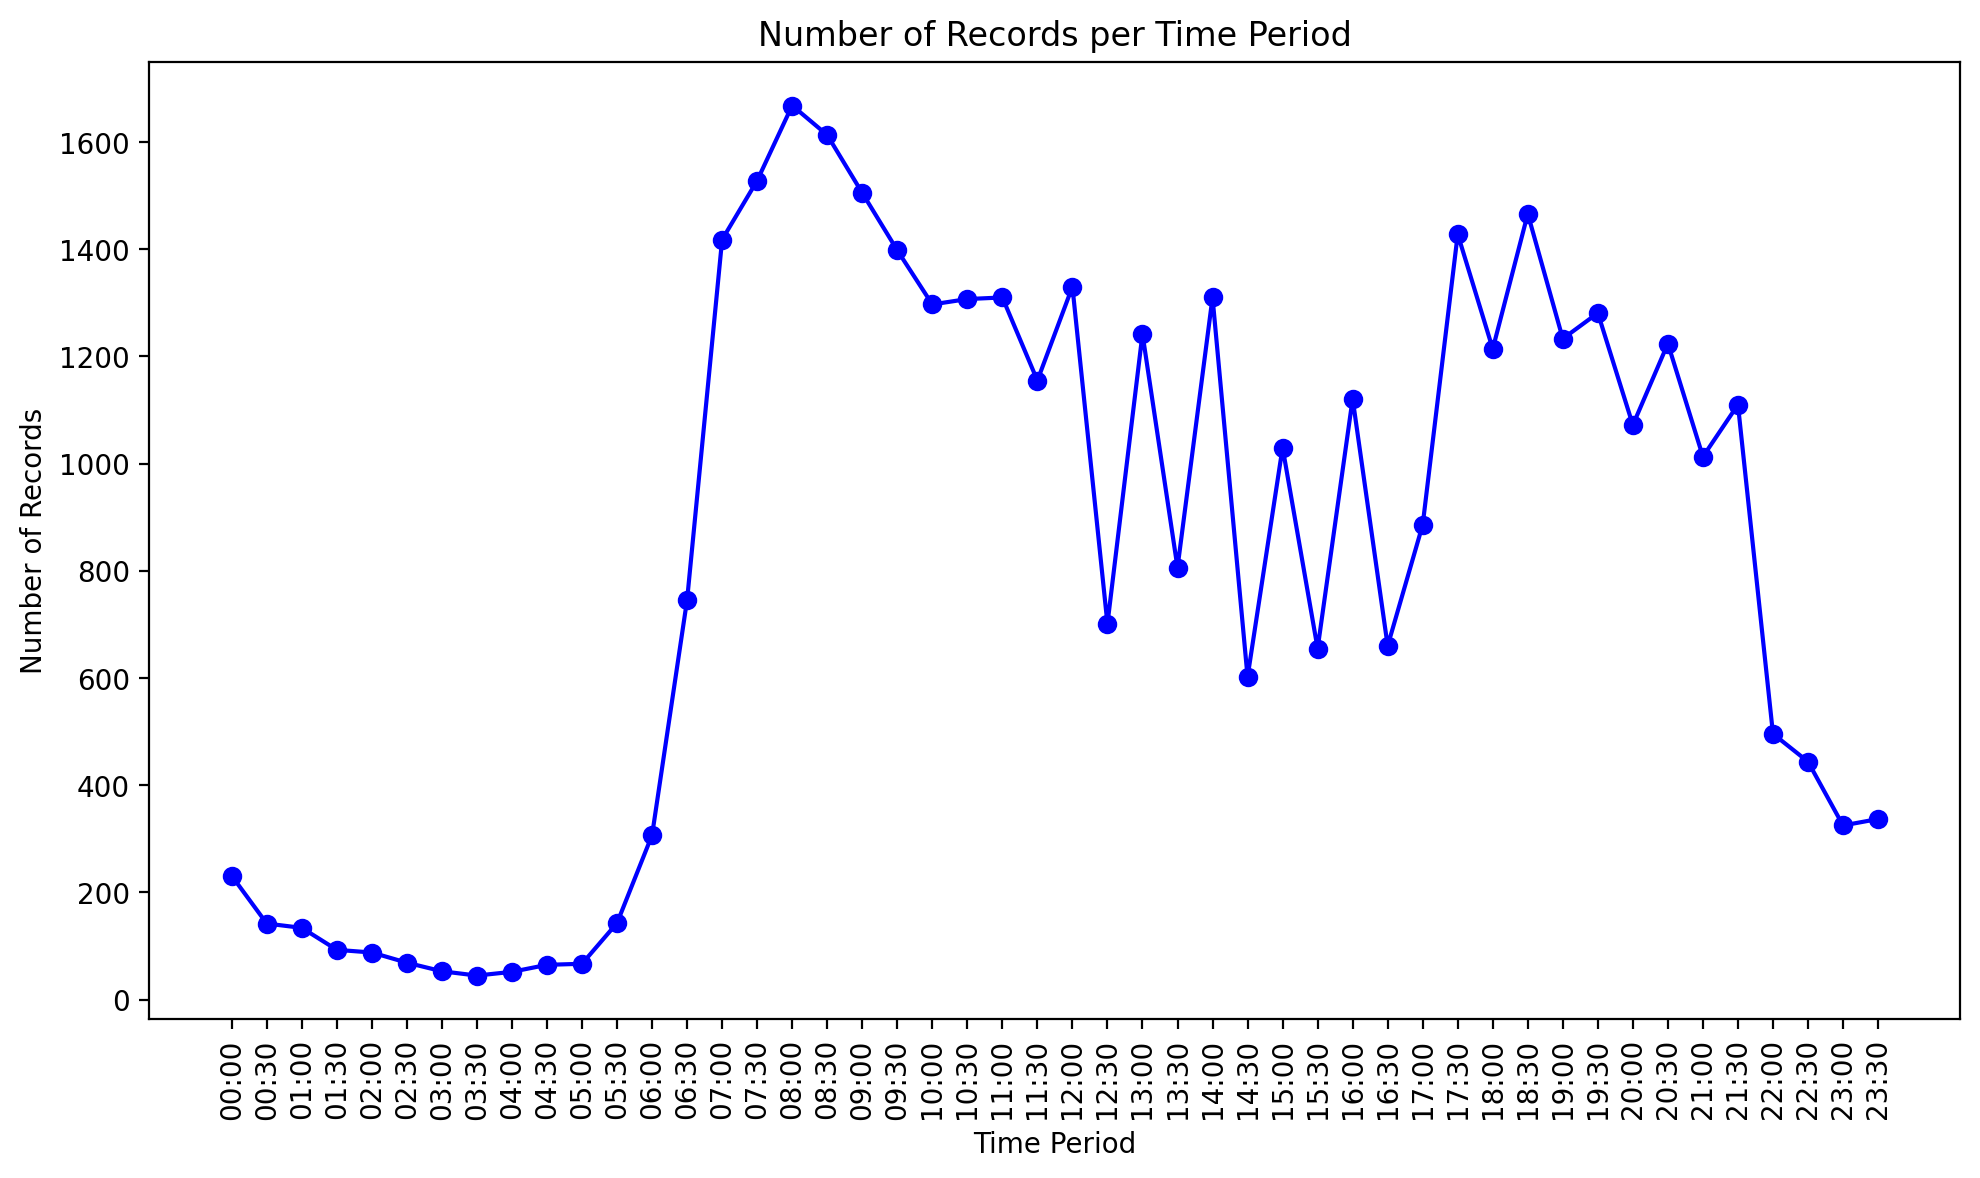

In [89]:
# 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(time_period_counts.index, time_period_counts.values, marker='o', linestyle='-', color='b')

# 设置图表标题和标签
plt.title('Number of Records per Time Period')
plt.xlabel('Time Period')
plt.ylabel('Number of Records')

# 设置X轴刻度为时间段对应的时间（比如，0 -> 00:00-00:30，1 -> 00:30-01:00等）
time_labels = [f"{(i // 2):02}:{(i % 2) * 30:02}" for i in range(48)]
plt.xticks(ticks=range(48), labels=time_labels, rotation=90)

# 显示图表
plt.tight_layout()
plt.show()

In [ ]:
# 定义一个函数来获取出发时间的半小时段
def get_time_period(start_time):
    hour = start_time.hour
    minute = start_time.minute
    period = (hour * 60 + minute) // 30
    return period

# 读取并绘制每个文件的图表
for i in range(20):
    if(i!=18):  # community_0.csv 到 community_19.csv
        file_name = f'community_{i}.csv'
        
        # 读取数据
    df = pd.read_csv(file_name)

    # 将 START_TIME 列转换为 datetime 格式
    df['START_TIME'] = pd.to_datetime(df['START_TIME'])

    # 创建一个新列 'TIME_PERIOD' 来存储每个出发时间的时间段
    df['TIME_PERIOD'] = df['START_TIME'].apply(get_time_period)

    # 统计每个时间段的行数
    time_period_counts = df['TIME_PERIOD'].value_counts().sort_index()

    # 绘制曲线图
    plt.figure(figsize=(10, 6))
    plt.plot(time_period_counts.index, time_period_counts.values, marker='o', linestyle='-', color='b')

    # 设置图表标题和标签
    plt.title(f'Number of Records per Time Period for {file_name}')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Records')

    # 设置X轴刻度为时间段对应的时间（比如，0 -> 00:00-00:30，1 -> 00:30-01:00等）
    time_labels = [f"{(i // 2):02}:{(i % 2) * 30:02}" for i in range(48)]
    plt.xticks(ticks=range(48), labels=time_labels, rotation=90)

    # 显示图表
    plt.tight_layout()
    plt.show()

Error processing file community_18.csv: [Errno 2] No such file or directory: 'community_18.csv'


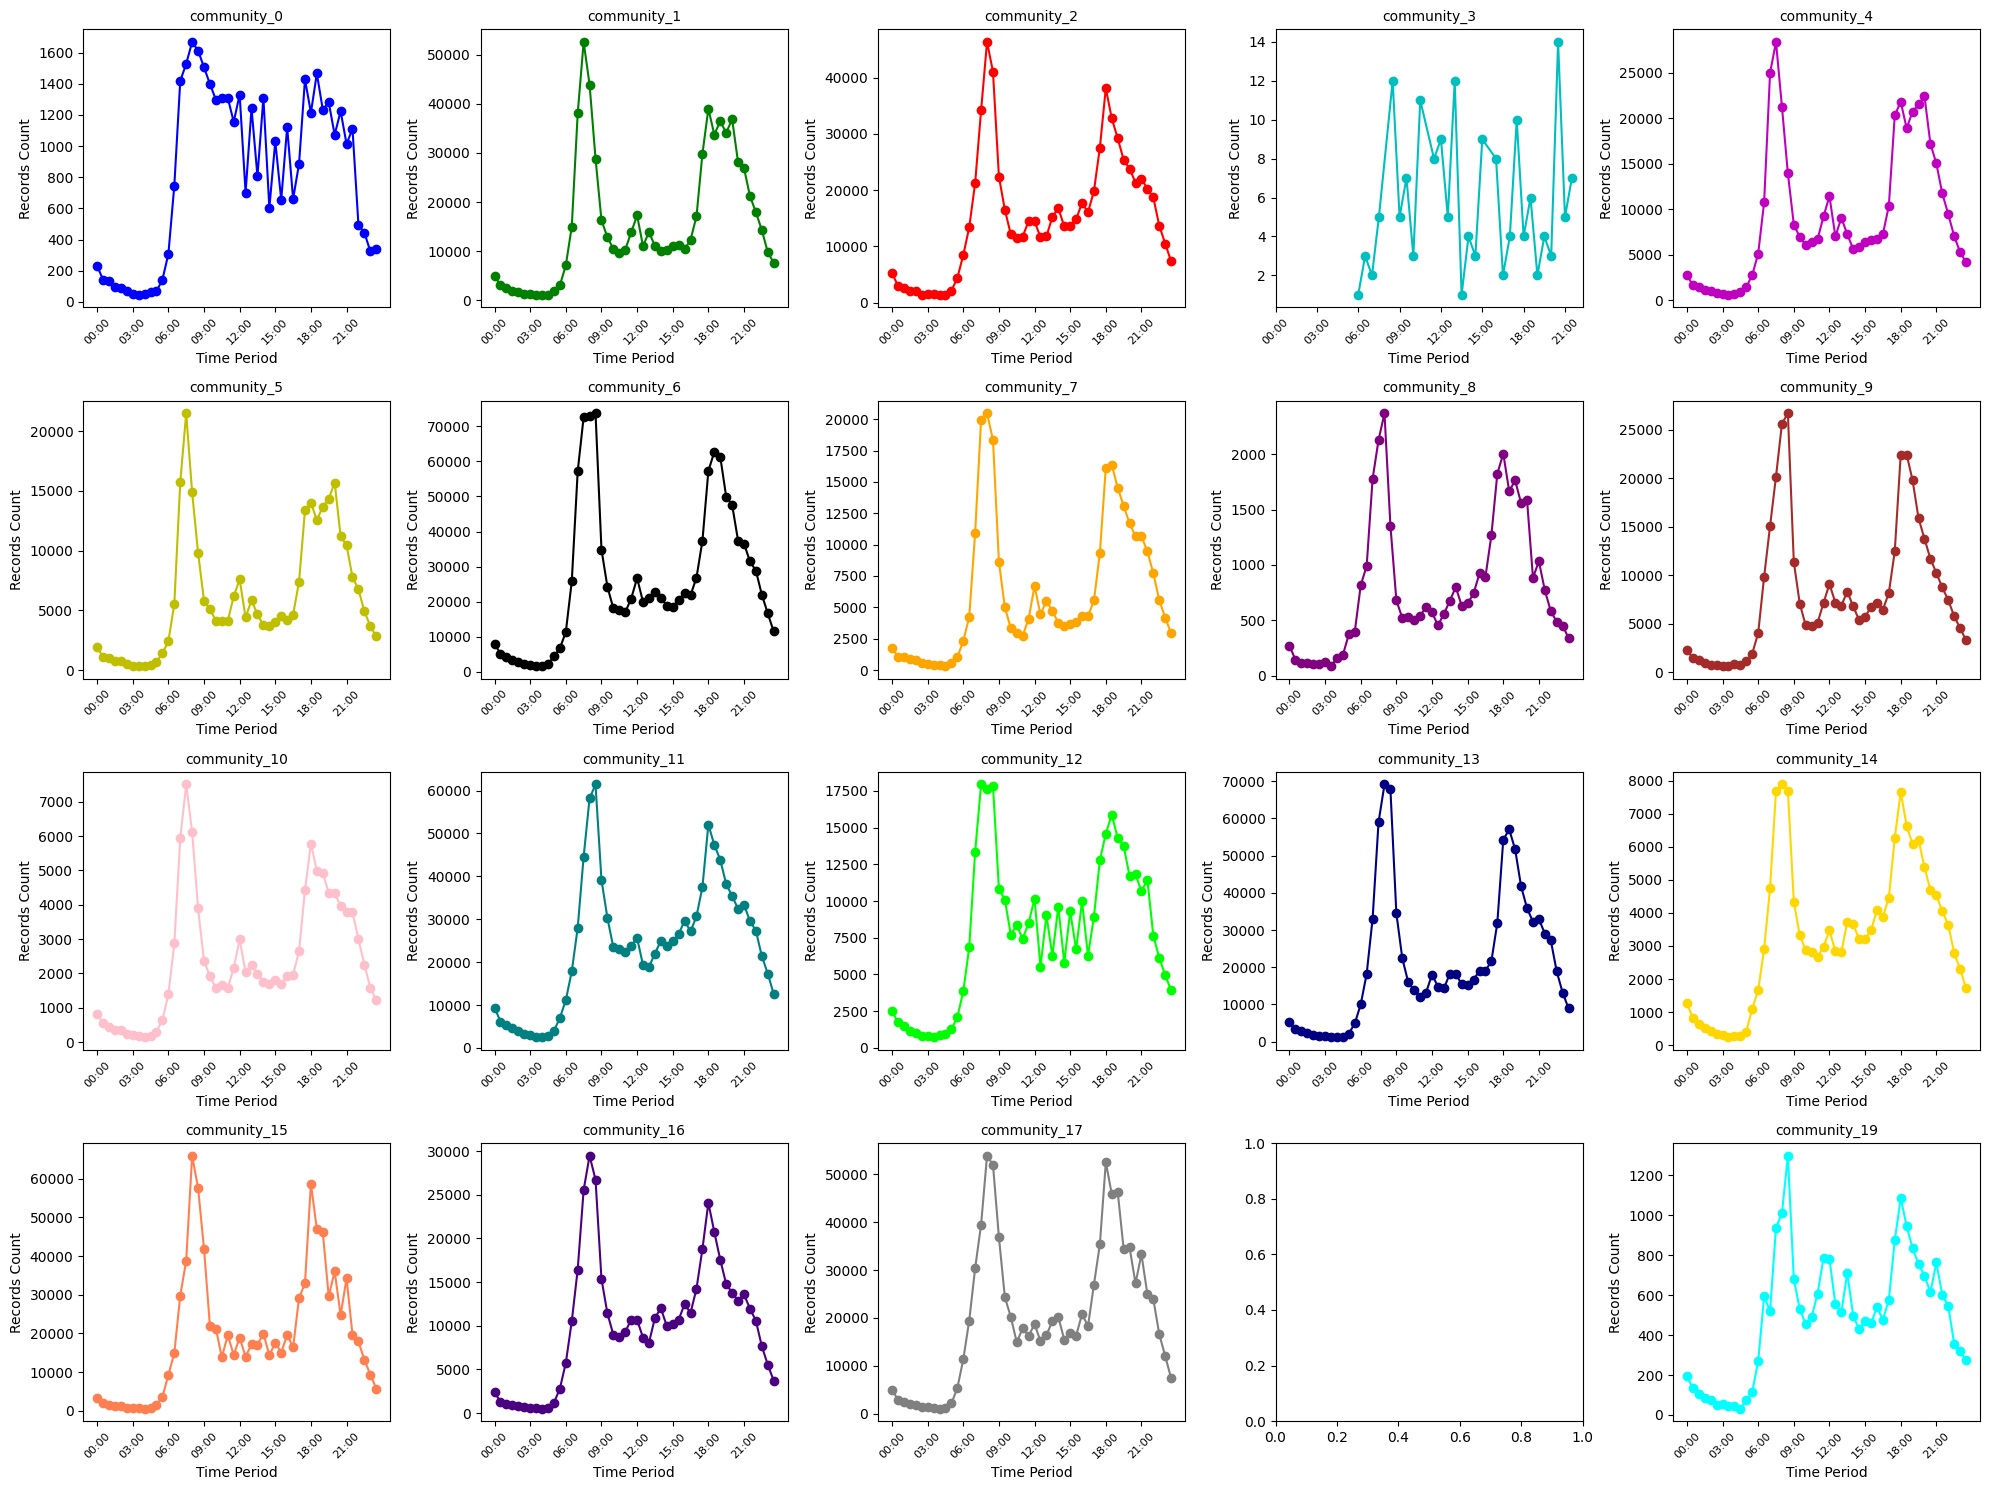

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义时间段划分函数
def get_time_period(start_time):
    hour = start_time.hour
    minute = start_time.minute
    return (hour * 60 + minute) // 30

# 创建一个大画布
fig, axes = plt.subplots(4, 5, figsize=(20, 15))  # 4行5列，20个子图
axes = axes.flatten()  # 将二维数组展平成一维以便迭代

# 定义颜色列表（可以根据需要扩展）
colors = [
    "b", "g", "r", "c", "m", "y", "k", "orange", "purple", "brown",
    "pink", "teal", "lime", "navy", "gold", "coral", "indigo", "gray", "olive", "cyan"
]

# 遍历每个文件
for i in range(20):
    file_name = f'community_{i}.csv'

    # 读取数据
    try:
        df = pd.read_csv(file_name)
        df['START_TIME'] = pd.to_datetime(df['START_TIME'])
        df['TIME_PERIOD'] = df['START_TIME'].apply(get_time_period)

        # 统计每个时间段的数量
        time_period_counts = df['TIME_PERIOD'].value_counts().sort_index()

        # 绘制子图
        ax = axes[i]
        ax.plot(
            time_period_counts.index, 
            time_period_counts.values, 
            marker='o', 
            linestyle='-', 
            color=colors[i % len(colors)]  # 循环使用颜色
        )
        ax.set_title(f'community_{i}', fontsize=10)
        ax.set_xlabel('Time Period')
        ax.set_ylabel('Records Count')
        ax.set_xticks(range(0, 48, 6))  # 显示每6个时间段一个刻度
        ax.set_xticklabels([f'{h // 2:02}:{(h % 2) * 30:02}' for h in range(0, 48, 6)], rotation=45, fontsize=8)

    except Exception as e:
        print(f"Error processing file {file_name}: {e}")
        continue

# 调整布局
plt.tight_layout()
plt.show()


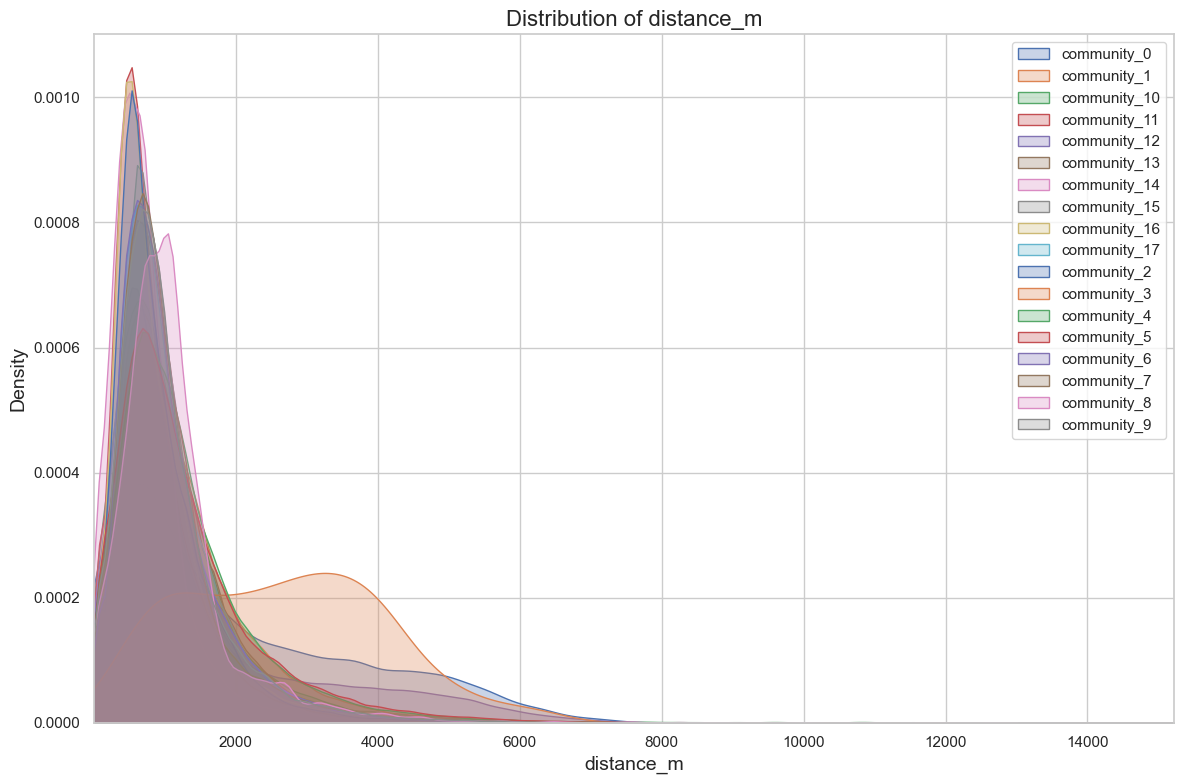

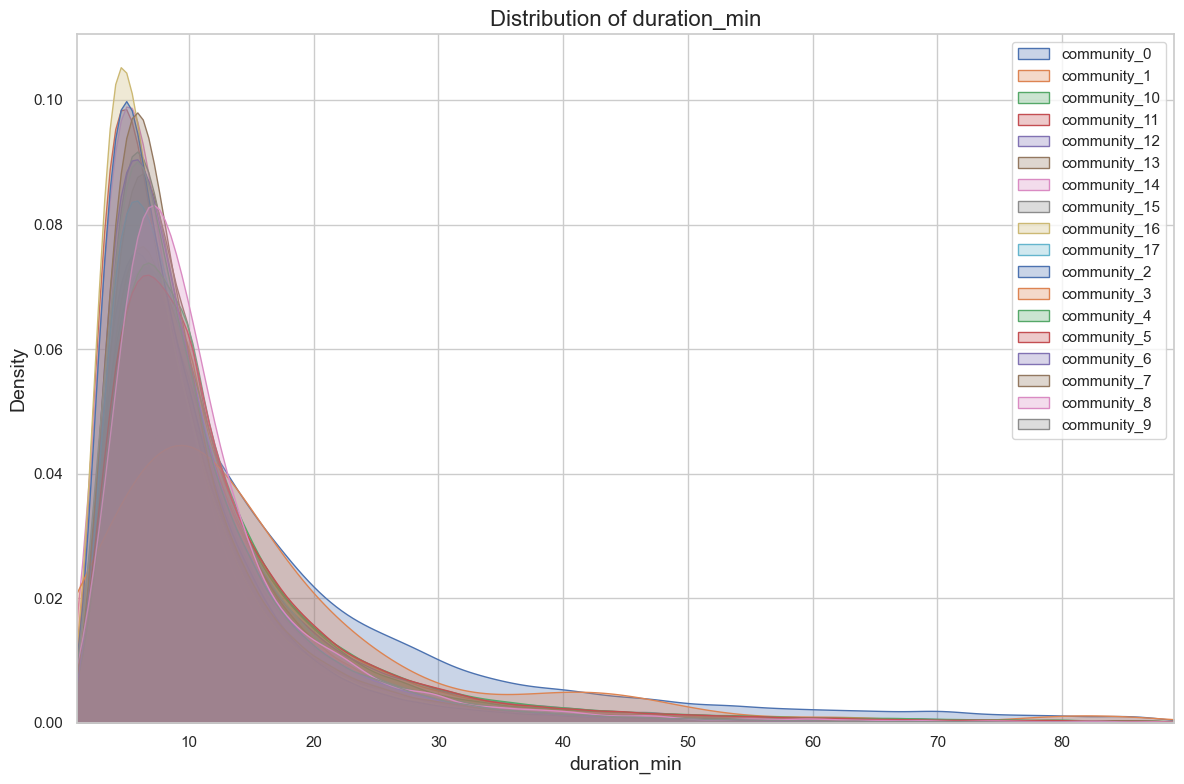

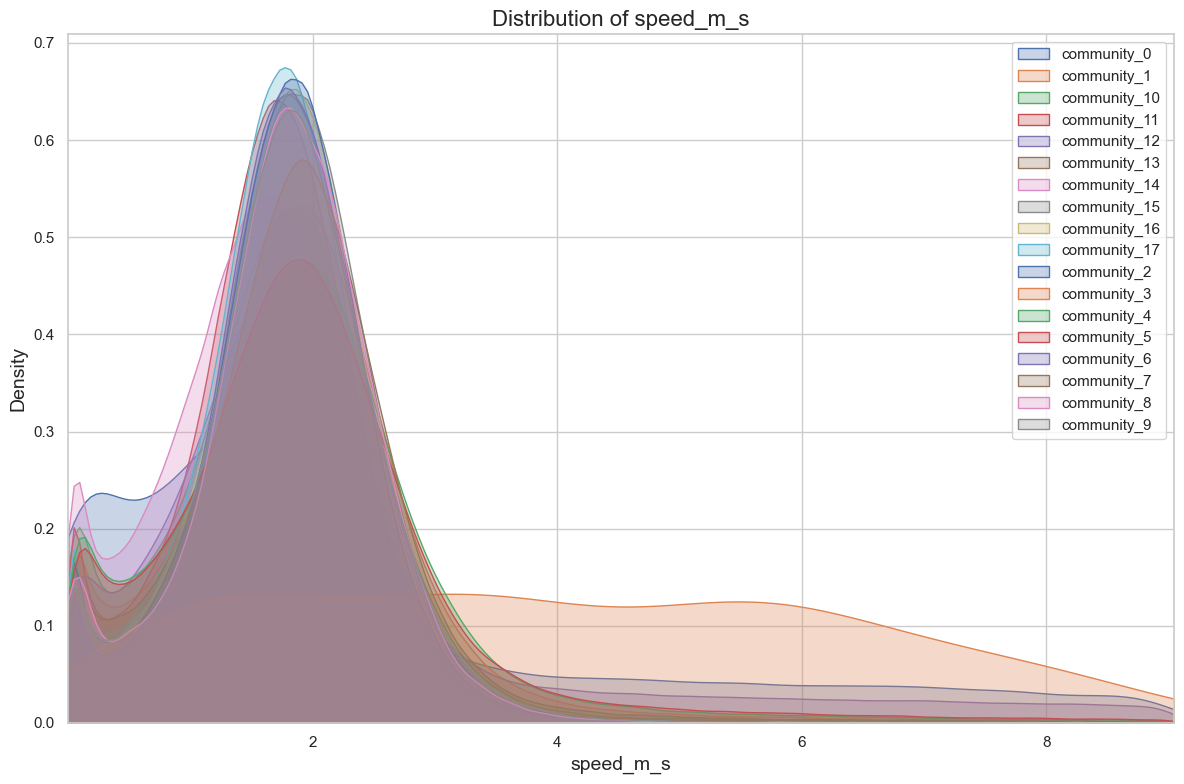

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取和合并数据
community_data = []
for i in range(18):
    file_name = f"community_{i}.csv"
    data = pd.read_csv(file_name)
    data['community'] = f"community_{i}"
    community_data.append(data)

# 合并所有社区数据
df = pd.concat(community_data, ignore_index=True)

# 需要分析的属性
columns_to_plot = ['distance_m', 'duration_min', 'speed_m_s']

# 绘制分布图
for col in columns_to_plot:
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    
    # 获取数据范围
    min_value = df[col].min()
    max_value = df[col].max()
    
    # 对每个社区分别绘制核密度估计曲线
    for community, group in df.groupby('community'):
        sns.kdeplot(group[col], label=community, fill=True, alpha=0.3, clip=(min_value, max_value))

    # 添加图例和标题
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.xlim(min_value, max_value)  # 限制横坐标范围
    plt.legend()
    plt.tight_layout()
    plt.show()


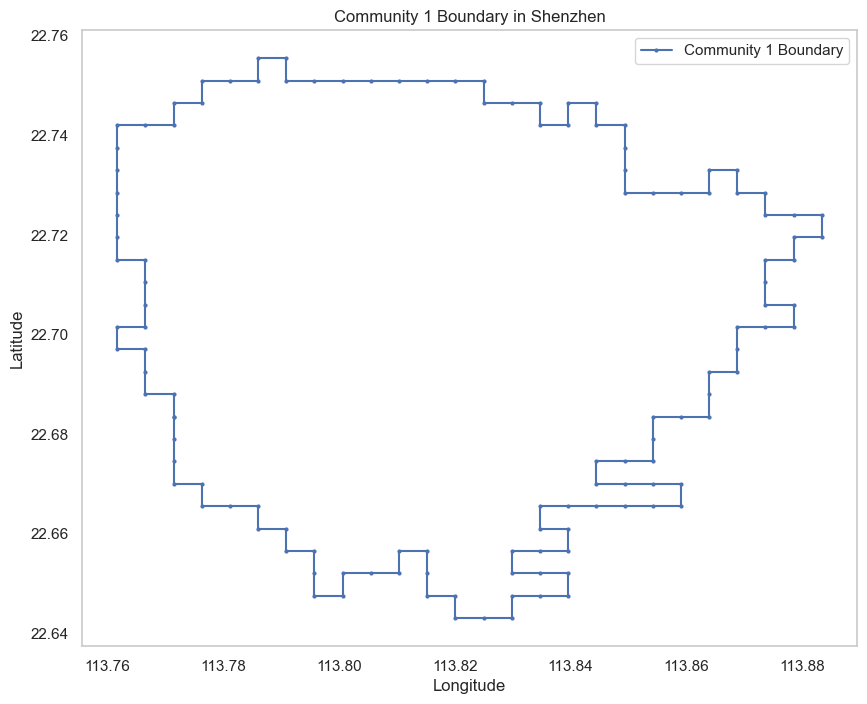

In [12]:
import matplotlib.pyplot as plt

# Define the coordinates for Community 1 boundary
coordinates = [
    (113.77140778607269, 22.683520851433546), (113.77140778607269, 22.68801745663997),
    (113.76653628182883, 22.68801745663997), (113.76653628182883, 22.692514061846392),
    (113.76653628182883, 22.697010667052815), (113.761664777585, 22.697010667052815),
    (113.761664777585, 22.701507272259235), (113.76653628182883, 22.701507272259235),
    (113.76653628182883, 22.70600387746566), (113.76653628182883, 22.71050048267208),
    (113.76653628182883, 22.714997087878505), (113.761664777585, 22.714997087878505),
    (113.761664777585, 22.719493693084928), (113.761664777585, 22.72399029829135),
    (113.761664777585, 22.728486903497775), (113.761664777585, 22.732983508704198),
    (113.761664777585, 22.73748011391062), (113.761664777585, 22.741976719117044),
    (113.76653628182883, 22.741976719117044), (113.77140778607269, 22.741976719117044),
    (113.77140778607269, 22.746473324323468), (113.77627929031652, 22.746473324323468),
    (113.77627929031652, 22.750969929529887), (113.78115079456038, 22.750969929529887),
    (113.78602229880421, 22.750969929529887), (113.78602229880421, 22.75546653473631),
    (113.79089380304806, 22.75546653473631), (113.79089380304806, 22.750969929529887),
    (113.7957653072919, 22.750969929529887), (113.80063681153575, 22.750969929529887),
    (113.80550831577959, 22.750969929529887), (113.81037982002344, 22.750969929529887),
    (113.81525132426728, 22.750969929529887), (113.82012282851113, 22.750969929529887),
    (113.82499433275497, 22.750969929529887), (113.82499433275497, 22.746473324323468),
    (113.82986583699882, 22.746473324323468), (113.83473734124266, 22.746473324323468),
    (113.83473734124266, 22.741976719117044), (113.83960884548651, 22.741976719117044),
    (113.83960884548651, 22.746473324323468), (113.84448034973035, 22.746473324323468),
    (113.84448034973035, 22.741976719117044), (113.8493518539742, 22.741976719117044),
    (113.8493518539742, 22.73748011391062), (113.8493518539742, 22.732983508704198),
    (113.8493518539742, 22.728486903497775), (113.85422335821804, 22.728486903497775),
    (113.85909486246189, 22.728486903497775), (113.86396636670572, 22.728486903497775),
    (113.86396636670572, 22.732983508704198), (113.86883787094958, 22.732983508704198),
    (113.86883787094958, 22.728486903497775), (113.87370937519341, 22.728486903497775),
    (113.87370937519341, 22.72399029829135), (113.87858087943727, 22.72399029829135),
    (113.8834523836811, 22.72399029829135), (113.8834523836811, 22.719493693084928),
    (113.87858087943727, 22.719493693084928), (113.87858087943727, 22.714997087878505),
    (113.87370937519341, 22.714997087878505), (113.87370937519341, 22.71050048267208),
    (113.87370937519341, 22.70600387746566), (113.87858087943727, 22.70600387746566),
    (113.87858087943727, 22.701507272259235), (113.87370937519341, 22.701507272259235),
    (113.86883787094958, 22.701507272259235), (113.86883787094958, 22.697010667052815),
    (113.86883787094958, 22.692514061846392), (113.86396636670572, 22.692514061846392),
    (113.86396636670572, 22.68801745663997), (113.86396636670572, 22.683520851433546),
    (113.85909486246189, 22.683520851433546), (113.85422335821804, 22.683520851433546),
    (113.85422335821804, 22.679024246227122), (113.85422335821804, 22.6745276410207),
    (113.8493518539742, 22.6745276410207), (113.84448034973035, 22.6745276410207),
    (113.84448034973035, 22.670031035814276), (113.8493518539742, 22.670031035814276),
    (113.85422335821804, 22.670031035814276), (113.85909486246189, 22.670031035814276),
    (113.85909486246189, 22.665534430607853), (113.85422335821804, 22.665534430607853),
    (113.8493518539742, 22.665534430607853), (113.84448034973035, 22.665534430607853),
    (113.83960884548651, 22.665534430607853), (113.83473734124266, 22.665534430607853),
    (113.83473734124266, 22.66103782540143), (113.83960884548651, 22.66103782540143),
    (113.83960884548651, 22.656541220195006), (113.83473734124266, 22.656541220195006),
    (113.82986583699882, 22.656541220195006), (113.82986583699882, 22.652044614988586),
    (113.83473734124266, 22.652044614988586), (113.83960884548651, 22.652044614988586),
    (113.83960884548651, 22.647548009782163), (113.83473734124266, 22.647548009782163),
    (113.82986583699882, 22.647548009782163), (113.82986583699882, 22.64305140457574),
    (113.82499433275497, 22.64305140457574), (113.82012282851113, 22.64305140457574),
    (113.82012282851113, 22.647548009782163), (113.81525132426728, 22.647548009782163),
    (113.81525132426728, 22.652044614988586), (113.81525132426728, 22.656541220195006),
    (113.81037982002344, 22.656541220195006), (113.81037982002344, 22.652044614988586),
    (113.80550831577959, 22.652044614988586), (113.80063681153575, 22.652044614988586),
    (113.80063681153575, 22.647548009782163), (113.7957653072919, 22.647548009782163),
    (113.7957653072919, 22.652044614988586), (113.7957653072919, 22.656541220195006),
    (113.79089380304806, 22.656541220195006), (113.79089380304806, 22.66103782540143),
    (113.78602229880421, 22.66103782540143), (113.78602229880421, 22.665534430607853),
    (113.78115079456038, 22.665534430607853), (113.77627929031652, 22.665534430607853),
    (113.77627929031652, 22.670031035814276), (113.77140778607269, 22.670031035814276),
    (113.77140778607269, 22.6745276410207), (113.77140778607269, 22.679024246227122),
    (113.77140778607269, 22.683520851433546)
]

# Separate the coordinates into X (longitude) and Y (latitude) lists
x, y = zip(*coordinates)

# Plot the boundary on the map
plt.figure(figsize=(10, 8))
plt.plot(x, y, marker='o', markersize=2, label='Community 1 Boundary')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Community 1 Boundary in Shenzhen")
plt.legend()
plt.grid()
plt.show()


In [7]:
import folium
import ast
import pandas as pd
import random

# 文件路径
csv_file = "geo.csv"

# 解析 CSV 文件
data = []
with open(csv_file, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:  # 跳过空行
            # 提取社区编号和边界坐标
            community = line.split(" boundary coordinates:")[0].split(" ")[1]
            coordinates = line.split(": ")[1]
            coordinates = ast.literal_eval(coordinates)  # 将字符串转换为列表
            data.append({"Community": community, "Coordinates": coordinates})

# 转换为 DataFrame
df = pd.DataFrame(data)

# 创建深圳地图中心
shenzhen_center = [22.543096, 114.057865]  # 深圳市中心点坐标
m = folium.Map(location=shenzhen_center, zoom_start=12)

# 为每个社区生成固定颜色
community_colors = {}
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# 给每个社区分配一种颜色
for community in df["Community"].unique():
    community_colors[community] = random_color()

# 添加社区多边形和编号
for _, row in df.iterrows():
    community = row["Community"]
    coordinates = row["Coordinates"]
    # folium 的 Polygon 需要以 (纬度, 经度) 格式传入
    polygon = [(lat, lon) for lon, lat in coordinates]
    
    # 计算多边形中心点
    center_lat = sum(lat for lat, lon in polygon) / len(polygon)
    center_lon = sum(lon for lat, lon in polygon) / len(polygon)
    
    # 取社区对应的颜色
    color = community_colors[community]
    
    # 绘制多边形
    folium.Polygon(
        locations=polygon,
        color=color,
        weight=2,
        fill=True,
        fill_color=color,
        fill_opacity=0.5,  # 设置透明度
    ).add_to(m)
    
    # 在中心点添加社区编号
    folium.map.Marker(
        location=(center_lat, center_lon),
        icon=folium.DivIcon(html=f"""
            <div style="font-size: 12px; color: black; text-align: center;">
                {community}
            </div>
        """)
    ).add_to(m)

# 保存地图到 HTML 文件
m.save("shenzhen_community__map.html")
print("地图已保存为 'shenzhen_community_map.html'")


地图已保存为 'shenzhen_community_map.html'


In [8]:
m